In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\06_Logistic_regression\bank_full_2.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Understanding the the data

In [7]:
import pandas_profiling as pp
report = pp.ProfileReport(df, title='Bank_data_report', explorative=True)
report.to_widgets()

converting variable into on hat coding 

In [8]:
df2=pd.get_dummies(df, columns=['job', 'marital', 'education', 'default','job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month','poutcome'], drop_first=True)

In [9]:
df2.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep

In [10]:
df3=df2.drop(['y'],axis=1)


In [11]:
df3.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
  

In [12]:
df3['y']=df2['y']

In [13]:
df3.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,no
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,no
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,no
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,no
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,no


Converting y variable in label encoding 

In [14]:
from sklearn import preprocessing

In [15]:
label_encoder=preprocessing.LabelEncoder()
df3['y']=label_encoder.fit_transform(df3['y'])

train test split

In [16]:
x=df3.iloc[:,:-1]
y=df3.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\PawanK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred=classifier.predict(x_test)

In [21]:
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [22]:
y_pred_df=pd.DataFrame({'Actual_y':y_test , 'Predicted_y':classifier.predict(x_test)})

In [23]:
y_pred_df

,Actual_y,Predicted_y
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
18448,1,0
6654,0,0
17106,0,0
9025,1,1


Confusion matrix for model accuracy 

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[7841  139]
 [ 868  195]]


In [25]:
(7841+195)/(7841+395+868+139)*100

86.94146921995024

classification report

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.58      0.18      0.28      1063

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [27]:
classifier.predict_proba (x_test)[:,1]

array([1.24573312e-04, 7.34237652e-01, 2.10390748e-02, ...,
       1.86122441e-02, 5.56418556e-01, 1.11860559e-01])

ROC curve

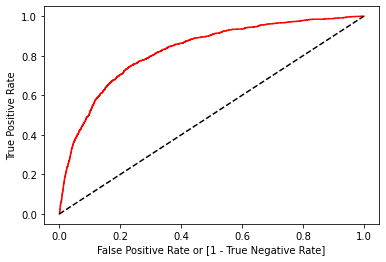

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()


#### testing model on the on orignal data

In [29]:
classifier2=LogisticRegression()
classifier2.fit(x,y)

C:\Users\PawanK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred2=classifier.predict(x)

In [31]:
y_pred_df2=pd.DataFrame({'Actual_y': y , 'Predicted_y':classifier.predict(x)})

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.59      0.19      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.86     45211



In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y,y_pred2)
print(confusion_matrix2)

[[39223   699]
 [ 4267  1022]]


In [34]:
(39223+1022)/(4267+699+39223+1022)*100

89.01594744641791

##### Accuracy of model is 89%